In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('spark').getOrCreate()

In [ ]:
!git clone https://github.com/education454/diabetes_dataset

fatal: destination path 'diabetes_dataset' already exists and is not an empty directory.


df = spark.read.csv('/content/diabetes_dataset/diabetes.csv', header=True, inferSchema=True)


In [ ]:
df = spark.read.csv('/content/diabetes_dataset/diabetes.csv', header=True, inferSchema=True)


In [ ]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          2|    138|           62|           35|      0|33.6|                   0.127| 47|      1|
|          0|     84|           82|           31|    125|38.2|                   0.233| 23|      0|
|          0|    145|            0|            0|      0|44.2|                    0.63| 31|      1|
|          0|    135|           68|           42|    250|42.3|                   0.365| 24|      1|
|          1|    139|           62|           41|    480|40.7|                   0.536| 21|      0|
|          0|    173|           78|           32|    265|46.5|                   1.159| 58|      0|
|          4|     99|           72|           17|      0|25.6|                   0.294| 28|      0|


In [ ]:
print(df.count(),len(df.columns))

2000 9


In [ ]:
df.describe().show()

+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------------+------------------+------------------+
|summary|      Pregnancies|           Glucose|     BloodPressure|    SkinThickness|          Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------------+------------------+------------------+
|  count|             2000|              2000|              2000|             2000|             2000|              2000|                    2000|              2000|              2000|
|   mean|           3.7035|          121.1825|           69.1455|           20.935|           80.254|32.192999999999984|     0.47092999999999974|           33.0905|             0.342|
| stddev|3.306063032730656|32.068635649902916|19.188314815604098|16.103242909926

In [ ]:
for c in df.columns:
  print(c + ":" + str(df[df[c].isNull()].count()))

Pregnancies:0
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:0


In [ ]:
def c_0():
  columns_list  = ['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']
  for c in columns_list:
    print(c,":",df[df[c]==0].count())

In [ ]:
c_0()

Glucose : 13
BloodPressure : 90
SkinThickness : 573
Insulin : 956
BMI : 28


+-------+-------------+-------------+-------+---+
|Glucose|BloodPressure|SkinThickness|Insulin|BMI|
+-------+-------------+-------------+-------+---+
|     13|           90|          573|    956| 28|
+-------+-------------+-------------+-------+---+



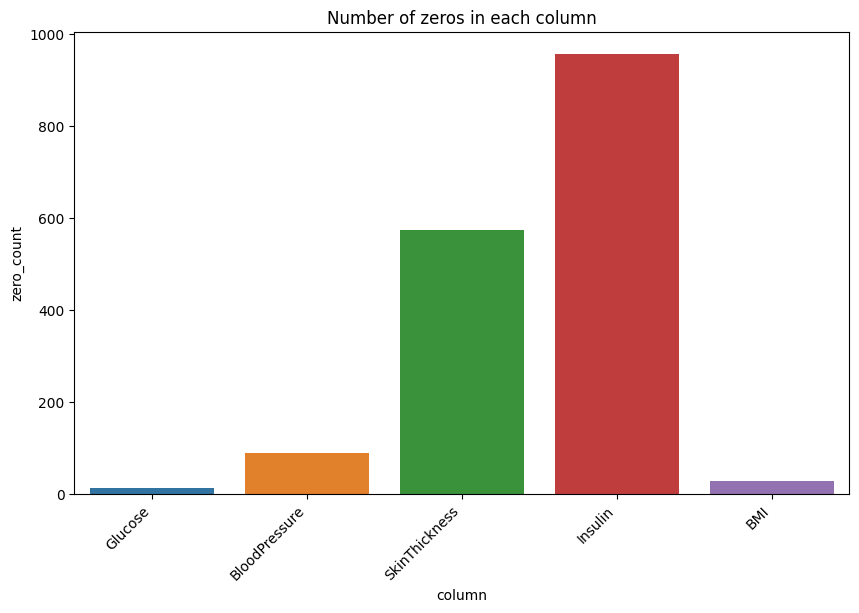

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Count zeros for each column
clist = ['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']

zero_counts = df.select([F.count(F.when(F.col(c) == 0, c)).alias(c) for c in clist])
zero_counts.show()

# Convert to Pandas DataFrame for plotting
zero_counts_pd = zero_counts.toPandas().transpose()
zero_counts_pd.columns = ["zero_count"]
zero_counts_pd.reset_index(inplace=True)
zero_counts_pd = zero_counts_pd.rename(columns={"index": "column"})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=zero_counts_pd, x="column", y="zero_count")
plt.xticks(rotation=45, ha="right")
plt.title("Number of zeros in each column")
plt.show()


In [ ]:
from pyspark.sql.functions import *

In [ ]:
from pyspark.sql import functions as F
df.agg(F.mean("BMI")).collect()[0][0]

32.192999999999984

In [ ]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          2|    138|           62|           35|      0|33.6|                   0.127| 47|      1|
|          0|     84|           82|           31|    125|38.2|                   0.233| 23|      0|
|          0|    145|            0|            0|      0|44.2|                    0.63| 31|      1|
|          0|    135|           68|           42|    250|42.3|                   0.365| 24|      1|
|          1|    139|           62|           41|    480|40.7|                   0.536| 21|      0|
|          0|    173|           78|           32|    265|46.5|                   1.159| 58|      0|
|          4|     99|           72|           17|      0|25.6|                   0.294| 28|      0|


In [ ]:
for col in df.columns[:8]:
  print(f'Correlation to target for {col} feature is {df.stat.corr("Outcome", col)}')


Correlation to target for Pregnancies feature is 0.22443699263363961
Correlation to target for Glucose feature is 0.4584213024234631
Correlation to target for BloodPressure feature is 0.07595808358896636
Correlation to target for SkinThickness feature is 0.07604024696581364
Correlation to target for Insulin feature is 0.12092362183050201
Correlation to target for BMI feature is 0.27672553877003214
Correlation to target for DiabetesPedigreeFunction feature is 0.1554590791569403
Correlation to target for Age feature is 0.23650924717620253


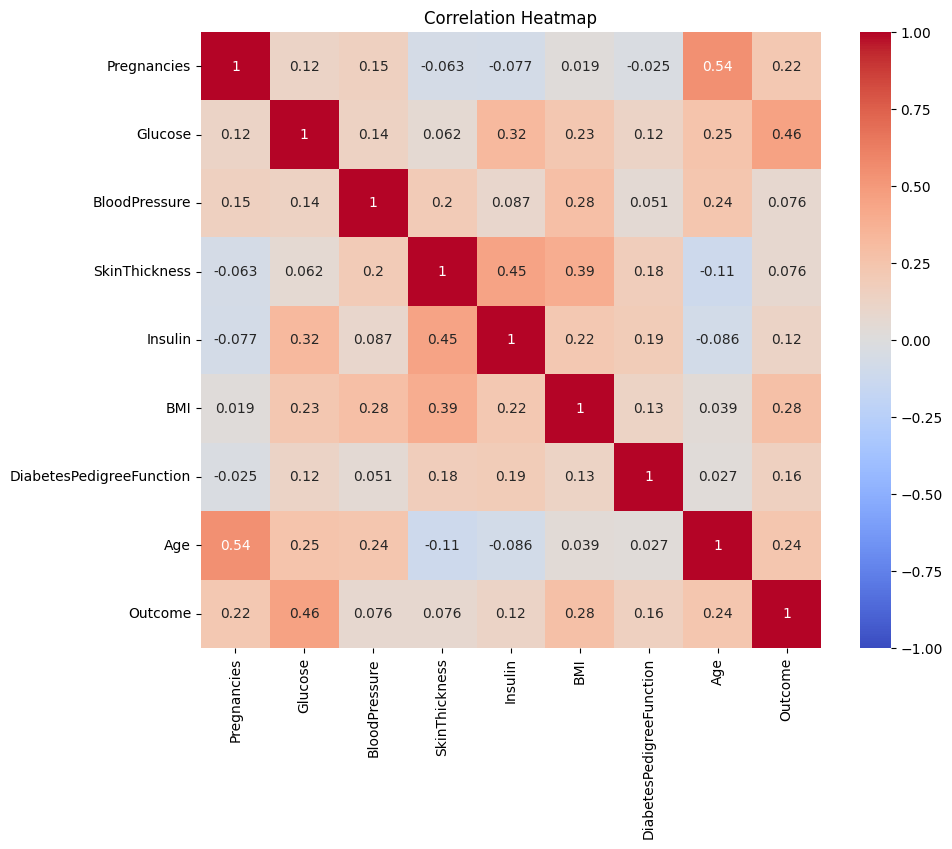

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Suppose df is your Spark DataFrame

# Step 1: Calculate the correlation matrix
# For this example, let's assume df has columns 'A', 'B', 'C', etc. Adjust as needed.
columns = df.columns
correlation_matrix = []
for col1 in columns:
    row = []
    for col2 in columns:
        row.append(df.corr(col1, col2))
    correlation_matrix.append(row)

# Step 2: Convert the correlation matrix to a Pandas DataFrame
import pandas as pd
correlation_df = pd.DataFrame(correlation_matrix, columns=columns, index=columns)

# Step 3: Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Now create the interaction term
# df = df.withColumn("Glucose_BMI_interaction", col("Glucose") * col("BMI"))

# Proceed with the rest of your code

# Add the interaction term to the assembler
assembler = VectorAssembler(
    inputCols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
    outputCol='features'
)
output_data = assembler.transform(df)


In [ ]:
# from pyspark.ml.feature import StandardScaler

# scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
# scalerModel = scaler.fit(output_data)
# scaledData = scalerModel.transform(output_data)


In [ ]:
# from pyspark.ml.feature import MinMaxScaler

# scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
# scalerModel = scaler.fit(output_data)
# scaledData = scalerModel.transform(output_data)


In [ ]:
final_data = output_data.select(['features','Outcome'])

In [ ]:
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Outcome: integer (nullable = true)



In [ ]:
train, test = final_data.randomSplit([0.7,0.3])

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train a logistic regression model
lr = LogisticRegression(labelCol="Outcome", featuresCol="features")
lr_model = lr.fit(train)

# Make predictions on test data
lr_predictions = lr_model.transform(test)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
print("Logistic Regression Accuracy: ", lr_accuracy)


Logistic Regression Accuracy:  0.777027027027027


In [ ]:
df_test = spark.read.csv('/content/diabetes_dataset/new_test.csv', header=True, inferSchema=True)



In [ ]:
df_test.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)



In [ ]:
# df_test = df_test.withColumn("Glucose_BMI_interaction", col("Glucose") * col("BMI"))
test_data = assembler.transform(df_test)

In [ ]:
test_data.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
# from pyspark.ml.classification import GBTClassifier
# from pyspark.ml.evaluation import BinaryClassificationEvaluator

# # Train a GBT model
# gbt = GBTClassifier(labelCol="Outcome", featuresCol="features", maxIter=10)

# # Train model
# gbt_model = gbt.fit(train)

# # Make predictions on the test set
# gbt_predictions = gbt_model.transform(test)

# # Evaluate the model
# gbt_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Outcome")
# gbt_accuracy = gbt_evaluator.evaluate(gbt_predictions)
# print("Gradient-Boosted Trees Classifier Accuracy: ", gbt_accuracy)

# # Display features, true label, and the prediction for the test data
# gbt_predictions.select("features", "Outcome", "prediction").show()

# # If you want to see more columns, you can add them to the select statement.
# # For example, to see the rawPrediction and probability columns as well:
# gbt_predictions.select("features", "Outcome", "rawPrediction", "probability", "prediction").show()



Gradient-Boosted Trees Classifier Accuracy:  0.925034155315378
+--------------------+-------+----------+
|            features|Outcome|prediction|
+--------------------+-------+----------+
|(8,[0,1,6,7],[2.0...|      0|       0.0|
|(8,[0,1,6,7],[2.0...|      0|       0.0|
|(8,[0,1,6,7],[10....|      1|       1.0|
|(8,[0,1,6,7],[10....|      1|       1.0|
|(8,[1,5,6,7],[73....|      0|       0.0|
|(8,[1,5,6,7],[99....|      0|       0.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[131...|      1|       1.0|
|(8,[1,6,7],[94.0,...|      0|       0.0|
|(8,[1,6,7],[94.0,...|      0|       0.0|
|[0.0,57.0,60.0,0....|      0|       0.0|
|[0.0,74.0,52.0,10...|      0|       0.0|
|[0.0,84.0,64.0,22...|      0|       0.0|
|[0.0,84.0,64.0,22...|      0|       0.0|
|[0.0,84.0,82.0,31...|      0|       0.0|
|[0.0,86.0,68.0,32...|      0|       0.0|
|[0.0,91.0,68.0,32...|      0|       1.0|
|[0.0,91.0,68.0,32...|      0|       1.0|
|[0.0,91.0,68

In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
import optuna
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the objective function for Optuna
def objective(trial):

    # 1. Train a GBT model
    gbt = GBTClassifier(labelCol="Outcome", featuresCol="features")

    # 2. Define hyperparameters using optuna
    maxDepth = trial.suggest_int("maxDepth", 2, 6)
    maxBins = trial.suggest_int("maxBins", 20, 30)
    maxIter = trial.suggest_int("maxIter", 10, 20)

    gbt = gbt.setMaxDepth(maxDepth).setMaxBins(maxBins).setMaxIter(maxIter)

    # 3. Train the GBT model
    gbt_model = gbt.fit(train)

    # 4. Make predictions
    gbt_predictions = gbt_model.transform(test)

    # 5. Evaluate the model
    gbt_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Outcome")
    accuracy = gbt_evaluator.evaluate(gbt_predictions)

    return accuracy

# Run Optuna study
study = optuna.create_study(direction="maximize") # Maximize accuracy
study.optimize(objective, n_trials=10) # Change n_trials based on your requirements

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train the GBT model with best hyperparameters
gbt = GBTClassifier(labelCol="Outcome", featuresCol="features")
gbt = gbt.setMaxDepth(trial.params["maxDepth"]).setMaxBins(trial.params["maxBins"]).setMaxIter(trial.params["maxIter"])
gbt_model = gbt.fit(train)

# Make predictions with the best model
gbt_predictions = gbt_model.transform(test)

# Display features, true label, and the prediction
gbt_predictions.select("features", "Outcome", "prediction").show()
gbt_predictions.select("features", "Outcome", "rawPrediction", "probability", "prediction").show()


[I 2023-09-24 00:24:30,231] A new study created in memory with name: no-name-06ba3357-8fbb-43e4-af6c-851b2fa00347
[I 2023-09-24 00:24:34,707] Trial 0 finished with value: 0.9031612266154443 and parameters: {'maxDepth': 4, 'maxBins': 30, 'maxIter': 17}. Best is trial 0 with value: 0.9031612266154443.
[I 2023-09-24 00:24:39,984] Trial 1 finished with value: 0.9236679427002308 and parameters: {'maxDepth': 5, 'maxBins': 21, 'maxIter': 13}. Best is trial 1 with value: 0.9236679427002308.
[I 2023-09-24 00:24:43,045] Trial 2 finished with value: 0.8523475861322652 and parameters: {'maxDepth': 3, 'maxBins': 30, 'maxIter': 13}. Best is trial 1 with value: 0.9236679427002308.
[I 2023-09-24 00:24:46,315] Trial 3 finished with value: 0.9321560458289927 and parameters: {'maxDepth': 5, 'maxBins': 25, 'maxIter': 11}. Best is trial 3 with value: 0.9321560458289927.
[I 2023-09-24 00:24:49,157] Trial 4 finished with value: 0.9294439108850617 and parameters: {'maxDepth': 5, 'maxBins': 23, 'maxIter': 13}.

Number of finished trials:  10
Best trial:
  Value:  0.958810718681942
  Params: 
    maxDepth: 6
    maxBins: 21
    maxIter: 13
+--------------------+-------+----------+
|            features|Outcome|prediction|
+--------------------+-------+----------+
|(8,[0,1,6,7],[2.0...|      0|       0.0|
|(8,[0,1,6,7],[2.0...|      0|       0.0|
|(8,[0,1,6,7],[10....|      1|       1.0|
|(8,[0,1,6,7],[10....|      1|       1.0|
|(8,[1,5,6,7],[73....|      0|       0.0|
|(8,[1,5,6,7],[99....|      0|       0.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[131...|      1|       1.0|
|(8,[1,6,7],[94.0,...|      0|       0.0|
|(8,[1,6,7],[94.0,...|      0|       0.0|
|[0.0,57.0,60.0,0....|      0|       0.0|
|[0.0,74.0,52.0,10...|      0|       0.0|
|[0.0,84.0,64.0,22...|      0|       0.0|
|[0.0,84.0,64.0,22...|      0|       0.0|
|[0.0,84.0,82.0,31...|      0|       0.0|
|[0.0,86.0,68.0,32...|      0|       0.0|
|[0.0,91.0,68.0,32...|      0|

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# 1. Train a GBT model
gbt = GBTClassifier(labelCol="Outcome", featuresCol="features")

# 2. Define the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 30])
             .addGrid(gbt.maxIter, [10, 20])
             .build())

# 3. Set up the cross-validation process
crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol="Outcome", rawPredictionCol="rawPrediction"),
                          numFolds=5)  # Use 5-fold cross validation

# 4. Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train)

# 5. Make predictions on the test set using the model with the best set of parameters
cv_predictions = cvModel.transform(test)

# 6. Evaluate the model
gbt_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Outcome")
cv_accuracy = gbt_evaluator.evaluate(cv_predictions)
print("Gradient-Boosted Trees Classifier Accuracy with CV: ", cv_accuracy)

# 7. Display features, true label, and the prediction for the test data
cv_predictions.select("features", "Outcome", "prediction").show()

# 8. Display the rawPrediction and probability columns as well
cv_predictions.select("features", "Outcome", "rawPrediction", "probability", "prediction").show()


Gradient-Boosted Trees Classifier Accuracy with CV:  0.9603798341607259
+--------------------+-------+----------+
|            features|Outcome|prediction|
+--------------------+-------+----------+
|(8,[0,1,6,7],[2.0...|      0|       0.0|
|(8,[0,1,6,7],[2.0...|      0|       0.0|
|(8,[0,1,6,7],[10....|      1|       1.0|
|(8,[0,1,6,7],[10....|      1|       1.0|
|(8,[1,5,6,7],[73....|      0|       0.0|
|(8,[1,5,6,7],[99....|      0|       0.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[131...|      1|       1.0|
|(8,[1,6,7],[94.0,...|      0|       0.0|
|(8,[1,6,7],[94.0,...|      0|       0.0|
|[0.0,57.0,60.0,0....|      0|       0.0|
|[0.0,74.0,52.0,10...|      0|       0.0|
|[0.0,84.0,64.0,22...|      0|       0.0|
|[0.0,84.0,64.0,22...|      0|       0.0|
|[0.0,84.0,82.0,31...|      0|       0.0|
|[0.0,86.0,68.0,32...|      0|       0.0|
|[0.0,91.0,68.0,32...|      0|       1.0|
|[0.0,91.0,68.0,32...|      0|       1.0|
|[0.